In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [7]:
grid_size = 4
n_states = grid_size* grid_size 

In [8]:
rewards = np.full((n_states),-1)
rewards[-1] = 0

In [10]:
actions = ['up','down','left','right']

def get_next_state(state,action):
    row, col = divmod(state, grid_size)
    if action == 'up' and row >0:
        return state - grid_size
    elif action == 'down' and row < grid_size - 1:
        return state + grid_size
    elif action == 'left' and col > 0:
        return state - 1
    elif action == 'right' and col < grid_size - 1:
        return state + 1
    else:
        return state + 1
    return state

In [18]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1

V = np.zeros(n_states)
episodes = 1000
state_history= []

In [19]:
for episode in range(episodes):
    state = 0
    while state != n_states - 1:
        if random.uniform(0,1) < epsilon:
            action = random.choice(actions)
        else:
            next_states = [get_next_state(state,action) for action in actions]
            action = actions[np.argmax([V[next_state] for next_state in next_states])]

        next_state = get_next_state(state,action)
        reward = rewards[next_state]

        V[state] += alpha * (reward + gamma * V[next_state] - V[state])
        state = next_state
    
    state_history.append(state)

In [20]:
print("State Value Estimates after Training:")
print(V.reshape(grid_size,grid_size))

State Value Estimates after Training:
[[-4.32999536 -3.70177807 -3.06543061 -2.42716833]
 [-3.7757728  -2.97602411 -2.11518039 -1.47786561]
 [-3.05103097 -2.52952945 -1.13020112 -0.26010648]
 [-2.24592478 -1.17878594 -0.05817608  0.        ]]


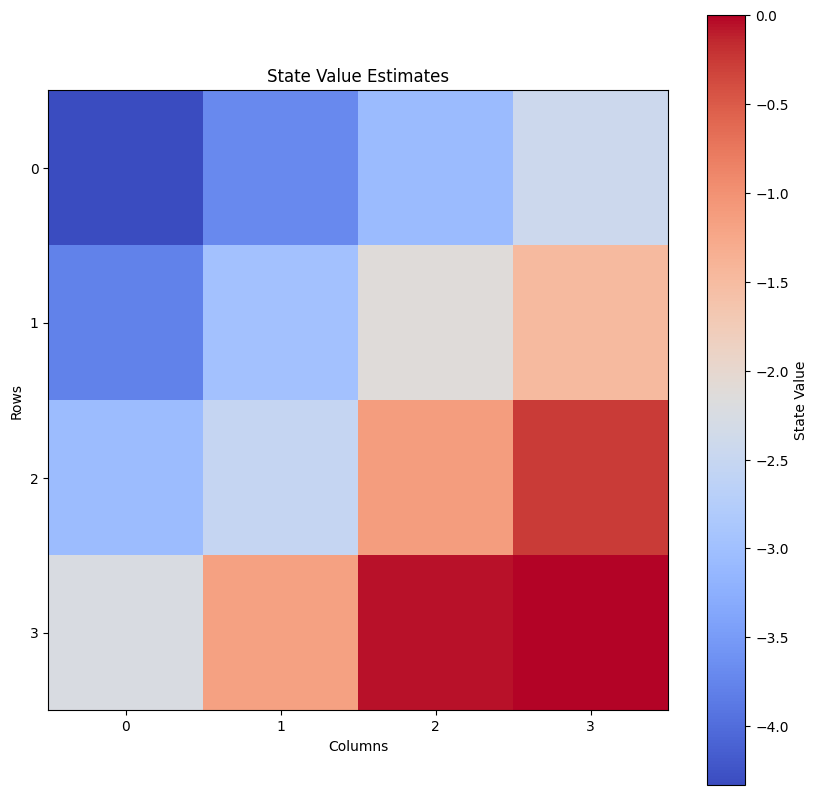

In [21]:
def plot_values(V):
    plt.figure(figsize=(10,10))
    plt.imshow(V.reshape(grid_size,grid_size), cmap='coolwarm', interpolation='none')
    plt.colorbar(label = 'State Value')
    plt.title('State Value Estimates')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.xticks(range(grid_size))
    plt.yticks(range(grid_size))
    plt.show()

plot_values(V)
    